In [13]:
%matplotlib inline
%load_ext autoreload

from pathlib import Path
import fastplotlib as fpl
import os
import sys
import masknmf
import tifffile
import torch
import numpy as np

import matplotlib.pyplot as plt
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
def load_from_dir(plane_dir):
    """
    Load all result files generated by `run_plane` from a given plane directory.

    Returns a dict with keys:
    - 'moco': np.ndarray
    - 'pmd_demixer': object
    - 'a': np.ndarray, returns the spatial components, where each component is a 2D image.
           output shape (fov dim1, fov dim 2, n_frames)
    - 'c': np.ndarray, returns the temporal traces, where each trace is a n_frames-shaped 
           time series. output shape (n_frames, n_components)
    """
    plane_dir = Path(plane_dir).expanduser()

    results = {}
    moco_path = plane_dir / "moco.npy"
    pmd_demixer_path = plane_dir / "pmd_demixer.npy"
    a_path = plane_dir / "a.npy"
    c_path = plane_dir / "a.npy"

    if moco_path.exists():
        results["moco"] = np.load(moco_path, allow_pickle=True)
    if pmd_demixer_path.exists():
        results["pmd_demixer"] = np.load(pmd_demixer_path, allow_pickle=True).item()
    if a_path.exists():
        results["a"] = np.load(a_path)
    if c_path.exists():
        results["c"] = np.load(c_path)
    return results

In [42]:
path1 = r"D:\W2_DATA\masknmf\mk301_kbarber\roi_1"
path2 = r"D:\W2_DATA\masknmf\mk301_kbarber\roi_2"
path3 = r"D:\W2_DATA\masknmf\imposter"

roi1_outputs = load_from_dir(path1)
roi2_outputs = load_from_dir(path2)
imposter_outputs = load_from_dir(path2)

In [43]:
roi1_results = roi1_outputs['pmd_demixer'].results
roi2_results = roi2_outputs['pmd_demixer'].results
imposter_results = imposter_outputs['pmd_demixer'].results

RFBOutputContext()

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
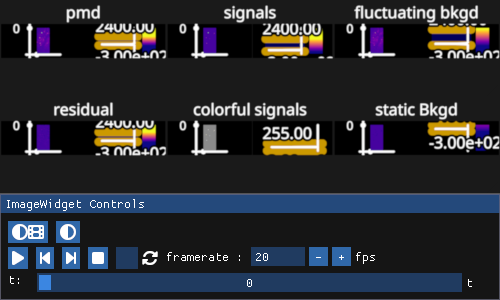

In [41]:
iw_roi1 = masknmf.visualization.make_demixing_video(
    roi1_results,
    'cuda',
    show_histogram = True,
    v_range = [-300, 2400],
)
iw_roi1.show()

In [44]:
iw_roi1.close()

In [ ]:
300

In [33]:
iw_roi1.figure.get_pygfx_render_area()

(0, 0, 1054, 918)

RFBOutputContext()

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
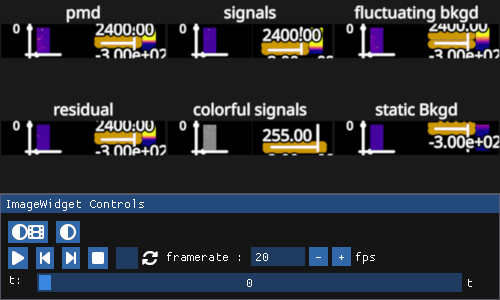

In [39]:
iw_roi2 = masknmf.visualization.make_demixing_video(
    roi2_results,
    'cuda',
    show_histogram = True,
    v_range = [-300, 2400],
)
iw_roi2.show()

In [40]:
iw_roi2.close()

RFBOutputContext()

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
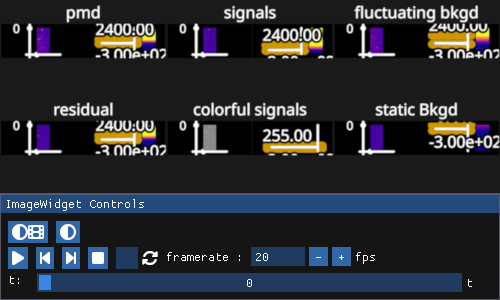

In [46]:
iw_imposter = masknmf.visualization.make_demixing_video(
    imposter_results,
    'cuda',
    show_histogram = True,
    v_range = [-300, 2400],
)
iw_imposter.show()

In [47]:
import tifffile
zplane = tifffile.memmap(r"D:\W2_DATA\masknmf\mk301_kbarber\roi_1\plane_07.tif")

In [54]:
tifffile.imwrite(r"D:\W2_DATA\masknmf\mk301_kbarber\roi_1\plane_07_subsample.tif", zplane[:-320])

In [55]:
zplane.shape, zplane[:-320].shape

((5632, 448, 224), (5312, 448, 224))